# fastai training

[<code>fastai.basic_train</code>](http://docs.fast.ai/basic_train.html#fastai.basic_train) wraps together the data (in a [<code>DataBunch</code>](http://docs.fast.ai/data.html#DataBunch) object) with a pytorch model to define a [<code>Learner</code>](http://docs.fast.ai/basic_train.html#Learner) object. This is where the basic training loop is defined in the [<code>fit</code>](http://docs.fast.ai/basic_train.html#fit) function. The [<code>Learner</code>](http://docs.fast.ai/basic_train.html#Learner) object is the entry point of most of the [<code>Callback</code>](http://docs.fast.ai/callback.html#Callback) functions that will customize this training loop in different ways (and made available through the [<code>fastai.train</code>](http://docs.fast.ai/train.html#fastai.train) module), notably:

 - `Learner.lr_find` will launch an LR range test that will help you select a good learning rate
 - `Learner.fit_one_cycle` will launch a training using the 1cycle policy, to help you train your model fast.
 - `Learner.to_fp16` will convert your model in half precision and halp you launch a training in mixed precision.

We'll do a quick overview of the key pieces of fastai's training modules. See the separate module docs (linked below) for details on each. We'll use the classic MNIST dataset for the training documentation, cut down to just 3's and 7's. The data is available in the fastai repo in the `docs/` directory.

To minimize the boilerplate in our docs we've defined the basic imports and paths we need in fastai.docs. It also has a [<code>get_mnist</code>](http://docs.fast.ai/docs.html#get_mnist) function to grab a [<code>DataBunch</code>](http://docs.fast.ai/data.html#DataBunch) of the data for us.

In [ ]:
from fastai.docs import *
data = get_mnist()

## Basic training with [<code>Learner</code>](http://docs.fast.ai/basic_train.html#Learner)

We can create minimal simple CNNs using [<code>simple_cnn</code>](http://docs.fast.ai/layers.html#simple_cnn) (see `models` for details on creating models):

In [ ]:
model = simple_cnn((3,16,16,2))

The most important object for training models is [<code>Learner</code>](http://docs.fast.ai/basic_train.html#Learner), which needs to know, at minimum, what data to train with and what model to train.

In [ ]:
learn = Learner(data, model)

That's enough to train a model, which is done using [<code>fit</code>](http://docs.fast.ai/basic_train.html#fit). If you have a CUDA-capable GPU it will be used automatically. You have to say how many epochs to train for.

In [ ]:
learn.fit(1)

Total time: 00:02
epoch  train loss  valid loss
0      0.147979    0.117889    (00:02)



## Viewing metrics

To see how our training is going, we can request that it reports various [<code>fastai.metrics</code>](http://docs.fast.ai/metrics.html#fastai.metrics) after each epoch. You can pass it to the constructor, or set it later. Note that metrics are always calculated on the validation set.

In [ ]:
learn.metrics=[accuracy]
learn.fit(1)

Total time: 00:02
epoch  train loss  valid loss  accuracy
0      0.096970    0.096102    0.967615  (00:02)



## Extending training with callbacks

You can use [<code>fastai.callback</code>](http://docs.fast.ai/callback.html#fastai.callback)s to modify training in almost any way you can imagine. For instance, we've provided a callback to implement Leslie Smith's 1cycle training method.

In [ ]:
cb = OneCycleScheduler(learn, lr_max=0.01)
learn.fit(1, callbacks=cb)

Total time: 00:02
epoch  train loss  valid loss  accuracy
0      0.073455    0.062231    0.978901  (00:02)



The [<code>Recorder</code>](http://docs.fast.ai/basic_train.html#Recorder) callback is automatically added for you, and you can use it to see what happened in your training, e.g.:

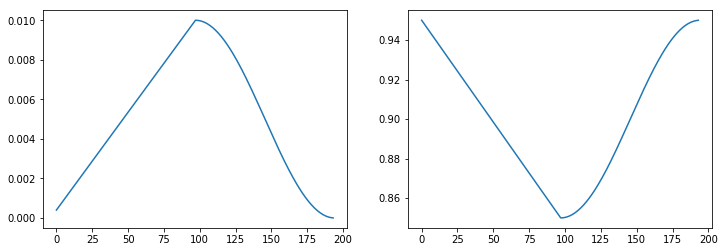

In [ ]:
learn.recorder.plot_lr(show_moms=True)

## Applications

Note that if you're training a model for one of our supported *applications*, there's a lot of help available to you in the application modules:

- [<code>fastai.vision</code>](http://docs.fast.ai/vision.html#fastai.vision)
- `text`
- `tabular`
- `colab`


In [ ]:
show_doc(Learner)

In [ ]:
show_doc(Learner.create_opt)

In [ ]:
show_doc(Learner.fit)

In [ ]:
show_doc(Learner.fit_one_cycle)

In [ ]:
show_doc(Learner.freeze)

In [ ]:
show_doc(Learner.freeze_to)

In [ ]:
show_doc(Learner.get_preds)

In [ ]:
show_doc(Learner.init)

In [ ]:
show_doc(Learner.load)

In [ ]:
show_doc(Learner.loss_fn)

In [ ]:
show_doc(Learner.lr_find)

In [ ]:
show_doc(Learner.lr_range)

In [ ]:
show_doc(Learner.mixup)

In [ ]:
show_doc(Learner.pred_batch)

In [ ]:
show_doc(Learner.save)

In [ ]:
show_doc(Learner.split)

In [ ]:
show_doc(Learner.to_fp16)

In [ ]:
show_doc(Learner.TTA)

In [ ]:
show_doc(Learner.tta_only)

In [ ]:
show_doc(Learner.unfreeze)

In [ ]:
show_doc(LearnerCallback)

In [ ]:
show_doc(Recorder)

In [ ]:
show_doc(Recorder.format_stats)

In [ ]:
show_doc(Recorder.on_backward_begin)

In [ ]:
show_doc(Recorder.on_batch_begin)

In [ ]:
show_doc(Recorder.on_epoch_end)

In [ ]:
show_doc(Recorder.on_train_begin)

In [ ]:
show_doc(Recorder.plot)

In [ ]:
show_doc(Recorder.plot_losses)

In [ ]:
show_doc(Recorder.plot_lr)

In [ ]:
show_doc(Recorder.plot_metrics)

In [ ]:
show_doc(fit)

In [ ]:
show_doc(loss_batch)

In [ ]:
show_doc(train_epoch)

In [ ]:
show_doc(validate)